### Imports

In [ ]:

from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_vis

### Simple example

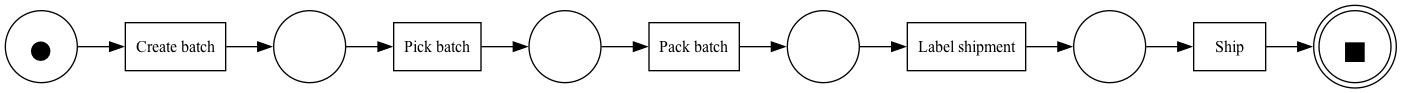

In [ ]:
# Build net
net = PetriNet("batch_shipping")

# Places
p_orders_ready   = PetriNet.Place("p_orders_ready")
p_batch_created  = PetriNet.Place("p_batch_created")
p_picked         = PetriNet.Place("p_picked")
p_packed         = PetriNet.Place("p_packed")
p_labeled        = PetriNet.Place("p_labeled")
p_shipped        = PetriNet.Place("p_shipped")

net.places.update({
    p_orders_ready, p_batch_created, p_picked, p_packed, p_labeled, p_shipped
})

# Transitions
t_create_batch = PetriNet.Transition("t_create_batch", "Create batch")
t_pick_batch   = PetriNet.Transition("t_pick_batch",   "Pick batch")
t_pack_batch   = PetriNet.Transition("t_pack_batch",   "Pack batch")
t_label        = PetriNet.Transition("t_label",        "Label shipment")
t_ship         = PetriNet.Transition("t_ship",         "Ship")

net.transitions.update({t_create_batch, t_pick_batch, t_pack_batch, t_label, t_ship})

# Arcs
petri_utils.add_arc_from_to(p_orders_ready,  t_create_batch, net)
petri_utils.add_arc_from_to(t_create_batch,  p_batch_created, net)

petri_utils.add_arc_from_to(p_batch_created, t_pick_batch, net)
petri_utils.add_arc_from_to(t_pick_batch,    p_picked, net)

petri_utils.add_arc_from_to(p_picked,        t_pack_batch, net)
petri_utils.add_arc_from_to(t_pack_batch,    p_packed, net)

petri_utils.add_arc_from_to(p_packed,        t_label, net)
petri_utils.add_arc_from_to(t_label,         p_labeled, net)

petri_utils.add_arc_from_to(p_labeled,       t_ship, net)
petri_utils.add_arc_from_to(t_ship,          p_shipped, net)

# Initial and final markings
# necesary to model
# Token interpretation: 1 token = "one batch worth of work" (not individual items)
im = Marking({p_orders_ready: 1})
fm = Marking({p_shipped: 1})

# Visualization
gviz = pn_vis.apply(net, im, fm)
pn_vis.view(gviz)



### Complex Example

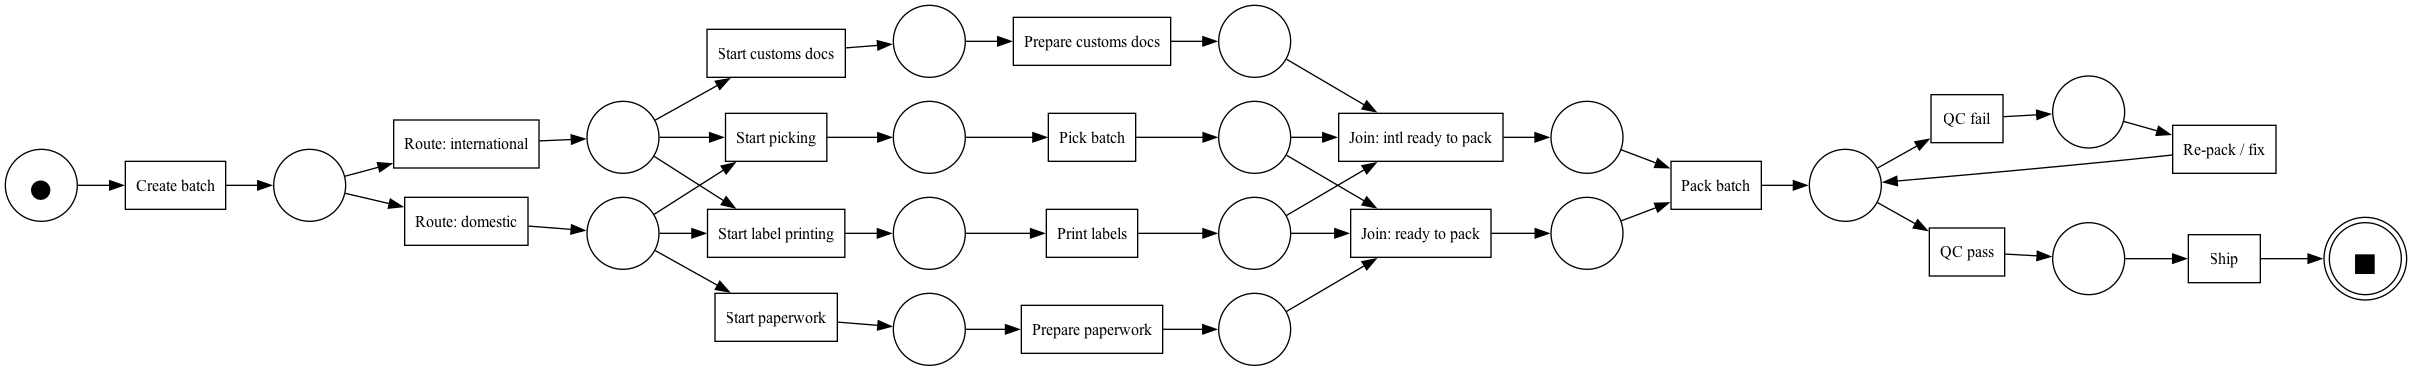

In [ ]:

# Buidl net
net = PetriNet("batch_shipping_nonlinear")

# PLaces
p_orders_ready       = PetriNet.Place("p_orders_ready")
p_batch_created      = PetriNet.Place("p_batch_created")

# Branching after batch created
p_domestic           = PetriNet.Place("p_domestic")
p_international      = PetriNet.Place("p_international")

# Parallel work (domestic path)
p_pick_ready         = PetriNet.Place("p_pick_ready")
p_label_ready        = PetriNet.Place("p_label_ready")
p_paperwork_ready    = PetriNet.Place("p_paperwork_ready")

p_picked             = PetriNet.Place("p_picked")
p_labeled            = PetriNet.Place("p_labeled")
p_paperwork_done     = PetriNet.Place("p_paperwork_done")

p_ready_to_pack      = PetriNet.Place("p_ready_to_pack")

# Pack loop
p_packed             = PetriNet.Place("p_packed")
p_qc_passed          = PetriNet.Place("p_qc_passed")
p_qc_failed          = PetriNet.Place("p_qc_failed")
p_shipped            = PetriNet.Place("p_shipped")

# International extras
p_customs_ready      = PetriNet.Place("p_customs_ready")
p_customs_done       = PetriNet.Place("p_customs_done")
p_intl_ready_to_pack = PetriNet.Place("p_intl_ready_to_pack")

net.places.update({
    p_orders_ready, p_batch_created,
    p_domestic, p_international,
    p_pick_ready, p_label_ready, p_paperwork_ready,
    p_picked, p_labeled, p_paperwork_done,
    p_ready_to_pack,
    p_packed, p_qc_passed, p_qc_failed, p_shipped,
    p_customs_ready, p_customs_done, p_intl_ready_to_pack
})

# Transitions
t_create_batch        = PetriNet.Transition("t_create_batch", "Create batch")

# SPlit in domestic international
t_route_domestic      = PetriNet.Transition("t_route_domestic", "Route: domestic")
t_route_international = PetriNet.Transition("t_route_international", "Route: international")

# Parallel tasks
t_start_pick          = PetriNet.Transition("t_start_pick", "Start picking")
t_pick_batch          = PetriNet.Transition("t_pick_batch", "Pick batch")

t_start_label         = PetriNet.Transition("t_start_label", "Start label printing")
t_print_labels        = PetriNet.Transition("t_print_labels", "Print labels")

t_start_paperwork     = PetriNet.Transition("t_start_paperwork", "Start paperwork")
t_prepare_paperwork   = PetriNet.Transition("t_prepare_paperwork", "Prepare paperwork")

# join before packing (domestic)
t_join_for_pack       = PetriNet.Transition("t_join_for_pack", "Join: ready to pack")

t_pack                = PetriNet.Transition("t_pack", "Pack batch")

# quality control loop
t_qc_pass             = PetriNet.Transition("t_qc_pass", "QC pass")
t_qc_fail             = PetriNet.Transition("t_qc_fail", "QC fail")
t_repack              = PetriNet.Transition("t_repack", "Re-pack / fix")

t_ship                = PetriNet.Transition("t_ship", "Ship")

# International extras (customs docs) + join
t_start_customs       = PetriNet.Transition("t_start_customs", "Start customs docs")
t_prepare_customs     = PetriNet.Transition("t_prepare_customs", "Prepare customs docs")
t_join_intl_for_pack  = PetriNet.Transition("t_join_intl_for_pack", "Join: intl ready to pack")

net.transitions.update({
    t_create_batch,
    t_route_domestic, t_route_international,
    t_start_pick, t_pick_batch,
    t_start_label, t_print_labels,
    t_start_paperwork, t_prepare_paperwork,
    t_join_for_pack,
    t_pack,
    t_qc_pass, t_qc_fail, t_repack,
    t_ship,
    t_start_customs, t_prepare_customs, t_join_intl_for_pack
})

# Arcs
# Create batch
petri_utils.add_arc_from_to(p_orders_ready, t_create_batch, net)
petri_utils.add_arc_from_to(t_create_batch, p_batch_created, net)

# domestic or international
petri_utils.add_arc_from_to(p_batch_created, t_route_domestic, net)
petri_utils.add_arc_from_to(t_route_domestic, p_domestic, net)

petri_utils.add_arc_from_to(p_batch_created, t_route_international, net)
petri_utils.add_arc_from_to(t_route_international, p_international, net)

# Domestic: AND-split into three parallel workstreams
petri_utils.add_arc_from_to(p_domestic, t_start_pick, net)
petri_utils.add_arc_from_to(t_start_pick, p_pick_ready, net)

petri_utils.add_arc_from_to(p_domestic, t_start_label, net)
petri_utils.add_arc_from_to(t_start_label, p_label_ready, net)

petri_utils.add_arc_from_to(p_domestic, t_start_paperwork, net)
petri_utils.add_arc_from_to(t_start_paperwork, p_paperwork_ready, net)

# Execute 
petri_utils.add_arc_from_to(p_pick_ready, t_pick_batch, net)
petri_utils.add_arc_from_to(t_pick_batch, p_picked, net)

petri_utils.add_arc_from_to(p_label_ready, t_print_labels, net)
petri_utils.add_arc_from_to(t_print_labels, p_labeled, net)

petri_utils.add_arc_from_to(p_paperwork_ready, t_prepare_paperwork, net)
petri_utils.add_arc_from_to(t_prepare_paperwork, p_paperwork_done, net)

# AND-join for packing
petri_utils.add_arc_from_to(p_picked, t_join_for_pack, net)
petri_utils.add_arc_from_to(p_labeled, t_join_for_pack, net)
petri_utils.add_arc_from_to(p_paperwork_done, t_join_for_pack, net)
petri_utils.add_arc_from_to(t_join_for_pack, p_ready_to_pack, net)

# Pack
petri_utils.add_arc_from_to(p_ready_to_pack, t_pack, net)
petri_utils.add_arc_from_to(t_pack, p_packed, net)

# Quality control pass/fail branching
petri_utils.add_arc_from_to(p_packed, t_qc_pass, net)
petri_utils.add_arc_from_to(t_qc_pass, p_qc_passed, net)

petri_utils.add_arc_from_to(p_packed, t_qc_fail, net)
petri_utils.add_arc_from_to(t_qc_fail, p_qc_failed, net)

# Loop back on fail, repack
petri_utils.add_arc_from_to(p_qc_failed, t_repack, net)
petri_utils.add_arc_from_to(t_repack, p_packed, net)

# Ship
petri_utils.add_arc_from_to(p_qc_passed, t_ship, net)
petri_utils.add_arc_from_to(t_ship, p_shipped, net)

# International
# Start customs
petri_utils.add_arc_from_to(p_international, t_start_customs, net)
petri_utils.add_arc_from_to(t_start_customs, p_customs_ready, net)

petri_utils.add_arc_from_to(p_customs_ready, t_prepare_customs, net)
petri_utils.add_arc_from_to(t_prepare_customs, p_customs_done, net)

# Reuse pick + label streams for international too (start from p_international)
petri_utils.add_arc_from_to(p_international, t_start_pick, net)
petri_utils.add_arc_from_to(p_international, t_start_label, net)

# International join: picked + labeled + customs_done
petri_utils.add_arc_from_to(p_picked, t_join_intl_for_pack, net)
petri_utils.add_arc_from_to(p_labeled, t_join_intl_for_pack, net)
petri_utils.add_arc_from_to(p_customs_done, t_join_intl_for_pack, net)
petri_utils.add_arc_from_to(t_join_intl_for_pack, p_intl_ready_to_pack, net)

# International pack goes into same pack/QC/ship section
petri_utils.add_arc_from_to(p_intl_ready_to_pack, t_pack, net)

# Markings
im = Marking({p_orders_ready: 1})
fm = Marking({p_shipped: 1})

# Visualize
gviz = pn_vis.apply(net, im, fm)
pn_vis.view(gviz)


### How to do weighted arcs (chat example)

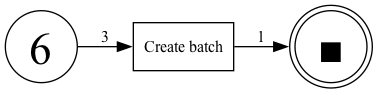

In [3]:
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_vis

net = PetriNet("arc_weight_example")

# Places
p_items = PetriNet.Place("p_items")      # individual items
p_batch = PetriNet.Place("p_batch")      # formed batch

net.places.update({p_items, p_batch})

# Transition
t_create_batch = PetriNet.Transition("t_create_batch", "Create batch")

net.transitions.add(t_create_batch)

# --- Weighted arcs ---
# Require 3 item-tokens to fire
petri_utils.add_arc_from_to(p_items, t_create_batch, net, weight=3)

# Produce 1 batch-token
petri_utils.add_arc_from_to(t_create_batch, p_batch, net, weight=1)

# --- Markings ---
# 6 items available → can create 2 batches
im = Marking({p_items: 6})
fm = Marking({p_batch: 2})

# Visualize
gviz = pn_vis.apply(net, im, fm)
pn_vis.view(gviz)
